## 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/"

/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터


In [3]:
!ls "/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/01.데이터/1.Training/라벨링데이터/글짓기_수필형/글짓기_초등_6학년_ESSAY_80711.json"

/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/01.데이터/1.Training/라벨링데이터/글짓기_수필형/글짓기_초등_6학년_ESSAY_80711.json


In [4]:
path ='/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/01.데이터/1.Training/라벨링데이터/글짓기_수필형/'
filepath = path + '글짓기_초등_6학년_ESSAY_80711.json'

import json, os

with open(filepath, 'r') as f:
  buf = json.load(f)
  paragraph_txt = buf['paragraph'][0]['paragraph_txt'].replace('#@문장구분#', '')
  print(paragraph_txt)

  paragraph_score = buf['score']['paragraph_score'][0]['paragraph_scoreT_avg']
  print(paragraph_score)

  essay_score = buf['score']['essay_scoreT_avg']
  print(essay_score)

  score_txt = str(round(paragraph_score+essay_score))
  print(type(score_txt))
  print(score_txt)

나는 상어다. 그 중에서 나는 백상아리입니다. 나는 대서양, 태평양의 따뜻한 바다에 주로 서식하며 전세계를 돌아다니는 편입니다. 한국, 서해안, 남해안, 동해안 역시 내가 지나가는 거처 주 하나입니다. 한국에도 종종 내가 출물하고 있으며 자주 보이진 않지만 해마다 꼭 나를 잡을려고 하고 있습니다. 작년에는 여수 앞바다에서 나의 동료 중 1명이 붙잡히고 말았습니다.그래서 우리 백상아리 친구들이 잡힌 친구를 위해 잠시 애도하는 시간을 가졌습니다. 나는 연골어류 악상어묵 악상어과의 바닷물고기로 최대 몸 길이는 6.5m 내외입니다.백상아리 친구 가운데 가장 큰 친구는 화석종으로 12m 이상 되기도 합니다.
낵가 바다속을 해엄처 다니고 있을때 범고래와 마주친 적이 있습니다. 똑똑한 범고래를 이길 수 없는 나는 범고래를 피해 도망친 적이 있습니다. 자존심이 상했지만 그래도 죽는 것 보다는 나으니까요.
2.6666667
26.516668
<class 'str'>
29


In [5]:
question = []
answer = []

filelist = os.listdir(path)
# print(filelist)

for file in filelist:
  if file.endswith('.json'):
    filepath = path + file
    with open(filepath, 'r') as f:
      buf = json.load(f)
      paragraph_txt = buf['paragraph'][0]['paragraph_txt'].replace('#@문장구분#', '')
      paragraph_score = buf['score']['paragraph_score'][0]['paragraph_scoreT_avg']
      #print(paragraph_score)

      essay_score = buf['score']['essay_scoreT_avg']
      #print(essay_score)

      score_txt = "_"+str(round(paragraph_score+essay_score))
      question.append(paragraph_txt)
      answer.append(score_txt)

## JSON 데이터를 DataFrame으로 변환

In [6]:
import pandas as pd
deep_learning_df = pd.DataFrame({'question': question, 'answer': answer})

In [7]:
deep_learning_df

,question,answer
0,나의 장래희망은 초등학교 선생님이 되는 것이다. 왜냐하면 나는 아이들을 가르치는 것...,_29
1,지금나는 중학교 2학년이다.,_25
2,저는 우리나라의 역사를 좋아하니깐 우리나라 역사를 가르치는 선생님이 되고 싶습니다....,_28
3,저는 간호사라는 삶의 목표를 가지고 있습니다. 간호사를 환자를 돌봐주고 도와주며 환...,_30
4,제가 10년 후에는 꿈을 찾아서 노력하고 있을 것 같습니다. 저는 현재 하고 싶은것...,_29
...,...,...
4569,내년부터 누리호보다 성능이 뛰어난 100t급 이상의 엔진을 갖춘 차세대 고출력·재활...,_30
4570,"우주는 나에게 동경의 대상이며, 흥미로운 동시에 어쩐지 두려움이 들기도 하는 대상이...",_28
4571,"저는 저랑 별로 친하지는 않았지만, 매일 학교에 오면 항상 붙어있게 되는 친구가 있...",_27
4572,중학교 1학년 때 전학 온 친구가 있었다. 바로 옆 반에 전학을 와서 빨리 친해졌고...,_28


### 에세이, 점수 길이 확인 및 길이 고정

In [8]:
def set_word_fixed_len(df):
  q_len = df['question'].apply(len).max()
  a_len = df['answer'].apply(len).max()

  def question_pad_string(s):
    return s.ljust(q_len+5)

  def answer_pad_string(s):
    return s.ljust(a_len+2)

  df['question'] = df['question'].apply(question_pad_string)
  df['answer'] = df['answer'].apply(answer_pad_string)
  df['q_length'] = df['question'].apply(len)
  df['a_length'] = df['answer'].apply(len)


In [9]:
set_word_fixed_len(deep_learning_df)
deep_learning_df

,question,answer,q_length,a_length
0,나의 장래희망은 초등학교 선생님이 되는 것이다. 왜냐하면 나는 아이들을 가르치는 것...,_29,3920,5
1,지금나는 중학교 2학년이다. ...,_25,3920,5
2,저는 우리나라의 역사를 좋아하니깐 우리나라 역사를 가르치는 선생님이 되고 싶습니다....,_28,3920,5
3,저는 간호사라는 삶의 목표를 가지고 있습니다. 간호사를 환자를 돌봐주고 도와주며 환...,_30,3920,5
4,제가 10년 후에는 꿈을 찾아서 노력하고 있을 것 같습니다. 저는 현재 하고 싶은것...,_29,3920,5
...,...,...,...,...
4569,내년부터 누리호보다 성능이 뛰어난 100t급 이상의 엔진을 갖춘 차세대 고출력·재활...,_30,3920,5
4570,"우주는 나에게 동경의 대상이며, 흥미로운 동시에 어쩐지 두려움이 들기도 하는 대상이...",_28,3920,5
4571,"저는 저랑 별로 친하지는 않았지만, 매일 학교에 오면 항상 붙어있게 되는 친구가 있...",_27,3920,5
4572,중학교 1학년 때 전학 온 친구가 있었다. 바로 옆 반에 전학을 와서 빨리 친해졌고...,_28,3920,5


## 실습 코드 로드

In [ ]:
# Clone ssuai github
!git clone https://github.com/ssuai/deep_learning_from_scratch_2.git

fatal: destination path 'deep_learning_from_scratch_2' already exists and is not an empty directory.


## 딥러닝 모델 학습 (Essay to Score)

### Attention 테스트

In [ ]:
%cd "/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/deep_learning_from_scratch_2/"

/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/deep_learning_from_scratch_2


------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

| 에폭 1 |  반복 1 / 32 | 시간 31[s] | 손실 7.56
| 에폭 1 |  반복 21 / 32 | 시간 177[s] | 손실 4.73
Q 인생에서 가장 소중한 것을 잃는 경험보다 더 슬픈 것은 없다. 미국의 심장부를 강타한 9.11 사건의 피해자들이 마지막 순간에 남긴 메시지는 사업이나 회사의 프로젝트 이야기가 아니었다. 그런말은 한마디도 없었다. 인생의 마지막 순간에 그들이 남긴 메시지는 하나같이 가족에게 남긴 사랑의 고백이었다. "여보, 난 당신을 사랑했어. 당신을 다시 봤으면 좋겠어 부디 애들하고 행복하게 살아." 많은 사람들이 일에 치여 가족도 잊은 듯 바쁘게 살아가지만, 목숨이 1분도 채 남아 있지 않았을 때는 결국 가족을 찾는다는 것이다. 어머니, 아버지, 여보, 애들아, 그렇다, 인생의 가장 본질적인 보람은 일이나 성공이 아니라 가족이다. 우리가 하는 일들이 아무리 소중하고 가치가 있어도 가족보다 더 중요한 것은 없다. 사람은 부족하기 마련이고, 부족한 면이 쉬이 발견되기 일쑤지만, 부부는 그것을 원망하거나 트집을 잡는 것이 아니라 그 부족함이 있기에 오늘 내가 그 사람 옆에 있는 것이다. 그것이 바로 내가 그 사람 곁에 존재하는 이유이다. 그러므로 부부는 상대의 가슴에서 그 무엇을 캐내는 광산이 아니라 오히려 상대의 가슴에 내 사랑을 저축하고, 행복을 저축하는 사랑은행 이어야 한다. 소설가 신달자씨가 어느 라디오대담에서 이런 말을 했다. 9년간의 시부모 병수발과 24년 남편 병수발을 했고 끝내 남편은 그렇게 죽었다. 일생 도움이 되지 않는 남편인 줄로만 알았다는 것이다. 그제야 남편의 존재가 자기에게 무엇을 해 주어서가 아니라 그냥 존재함으로 고

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


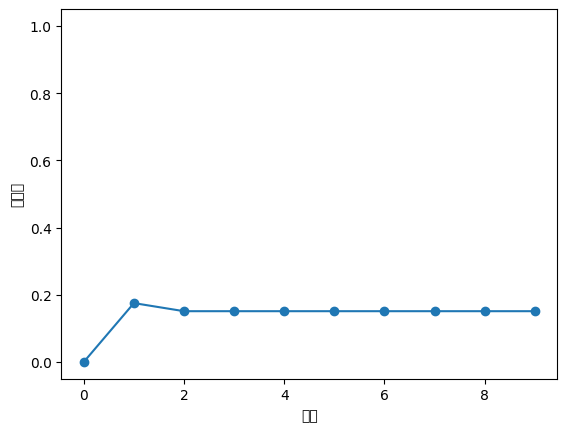

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
from common import config
config.GPU = True

import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data_from_dataframe(deep_learning_df)
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 32
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params('/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/EssayAttention.pkl')

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()

### PeekySeq2seq

In [ ]:
%cd "/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/deep_learning_from_scratch_2/"

/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/deep_learning_from_scratch_2


------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

| 에폭 1 |  반복 1 / 32 | 시간 9[s] | 손실 7.55
| 에폭 1 |  반복 21 / 32 | 시간 154[s] | 손실 4.55
Q 인생에서 가장 소중한 것을 잃는 경험보다 더 슬픈 것은 없다. 미국의 심장부를 강타한 9.11 사건의 피해자들이 마지막 순간에 남긴 메시지는 사업이나 회사의 프로젝트 이야기가 아니었다. 그런말은 한마디도 없었다. 인생의 마지막 순간에 그들이 남긴 메시지는 하나같이 가족에게 남긴 사랑의 고백이었다. "여보, 난 당신을 사랑했어. 당신을 다시 봤으면 좋겠어 부디 애들하고 행복하게 살아." 많은 사람들이 일에 치여 가족도 잊은 듯 바쁘게 살아가지만, 목숨이 1분도 채 남아 있지 않았을 때는 결국 가족을 찾는다는 것이다. 어머니, 아버지, 여보, 애들아, 그렇다, 인생의 가장 본질적인 보람은 일이나 성공이 아니라 가족이다. 우리가 하는 일들이 아무리 소중하고 가치가 있어도 가족보다 더 중요한 것은 없다. 사람은 부족하기 마련이고, 부족한 면이 쉬이 발견되기 일쑤지만, 부부는 그것을 원망하거나 트집을 잡는 것이 아니라 그 부족함이 있기에 오늘 내가 그 사람 옆에 있는 것이다. 그것이 바로 내가 그 사람 곁에 존재하는 이유이다. 그러므로 부부는 상대의 가슴에서 그 무엇을 캐내는 광산이 아니라 오히려 상대의 가슴에 내 사랑을 저축하고, 행복을 저축하는 사랑은행 이어야 한다. 소설가 신달자씨가 어느 라디오대담에서 이런 말을 했다. 9년간의 시부모 병수발과 24년 남편 병수발을 했고 끝내 남편은 그렇게 죽었다. 일생 도움이 되지 않는 남편인 줄로만 알았다는 것이다. 그제야 남편의 존재가 자기에게 무엇을 해 주어서가 아니라 그냥 존재함으로 고마

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


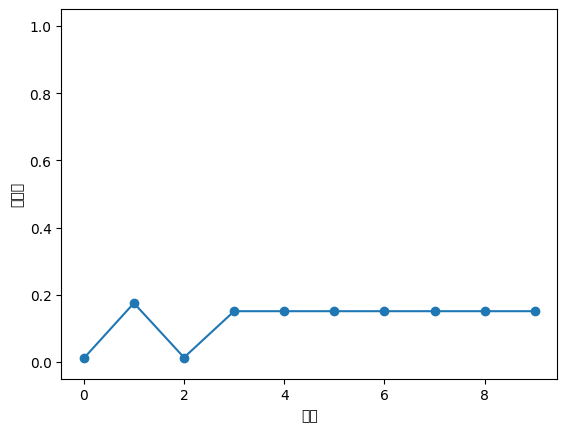

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
from common import config
config.GPU = True

import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data_from_dataframe(deep_learning_df)
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 32
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

# model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params('/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/EssayPeeky.pkl')

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()#

## 에세이 단어 추출

### KoNLPy With Google Colab

In [10]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,282 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:13 http://archive.ubuntu.c

E: Package 'python-dev' has no installation candidate


In [11]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [14]:
import konlpy
from konlpy.tag import Okt
from konlpy.utils import pprint

def list2seq(lst):
  return ' '.join(lst)

def seq2list(seq):
  # seq example) "인생 가장 경험 미국 심장 강타 사건 피해자 마지막 순간 메시지 사업 회사"
  return seq.split(' ')

def get_nouns_seq_with_no_dup(text):
  okt = Okt()
  nouns_list = okt.nouns(text)
  nouns_list = [noun for noun in nouns_list if len(noun) > 1] # 1글자는 제외
  nouns_list = list(set(nouns_list))  # 중복제거
  return list2seq(nouns_list)

def get_nouns_seq_with_dup(text):
  okt = Okt()
  nouns_list = okt.nouns(text)
  nouns_list = [noun for noun in nouns_list if len(noun) > 1] # 1글자는 제외
  return list2seq(nouns_list)

In [15]:
import konlpy
from konlpy.tag import Okt
from konlpy.utils import pprint
okt = Okt()
example = u'인생에서 가장 소중한 것을 잃는 경험보다 더 슬픈 것은 없다.#@문장구분# 미국의 심장부를 강타한 9.11 사건의 피해자들이 마지막 순간에 남긴 메시지는 사업이나 회사의 프로젝트 이야기가 아니었다.#@문장구분# 그런말은 한마디도 없었다. 인생의 마지막 순간에 그들이 남긴 메시지는 하나같이 가족에게 남긴 사랑의 고백이었다.#@문장구분# \"여보, 난 당신을 사랑했어.#@문장구분# 당신을 다시 봤으면 좋겠어 부디 애들하고 행복하게 살아.\"#@문장구분# 많은 사람들이 일에 치여 가족도 잊은 듯 바쁘게 살아가지만, 목숨이 1분도 채 남아 있지 않았을 때는 결국 가족을 찾는다는 것이다.#@문장구분# 어머니, 아버지, 여보, 애들아, 그렇다, 인생의 가장 본질적인 보람은 일이나 성공이 아니라 가족이다.#@문장구분# 우리가 하는 일들이 아무리 소중하고 가치가 있어도 가족보다 더 중요한 것은 없다.#@문장구분# 사람은 부족하기 마련이고, 부족한 면이 쉬이 발견되기 일쑤지만, 부부는 그것을 원망하거나 트집을 잡는 것이 아니라 그 부족함이 있기에 오늘 내가 그 사람 옆에 있는 것이다.#@문장구분# 그것이 바로 내가 그 사람 곁에 존재하는 이유이다.#@문장구분# 그러므로 부부는 상대의 가슴에서 그 무엇을 캐내는 광산이 아니라 오히려 상대의 가슴에 내 사랑을 저축하고, 행복을 저축하는 사랑은행 이어야 한다.#@문장구분# 소설가 신달자씨가 어느 라디오대담에서 이런 말을 했다.#@문장구분# 9년간의 시부모 병수발과 24년 남편 병수발을 했고 끝내 남편은 그렇게 죽었다.#@문장구분# 일생 도움이 되지 않는 남편인 줄로만 알았다는 것이다.#@문장구분# 그제야 남편의 존재가 자기에게 무엇을 해 주어서가 아니라 그냥 존재함으로 고마운 대상이라는 것이다.#@문장구분# 가족보다 중요한 것은 없는 것 같다.#@문장구분#'.replace('#@문장구분#', '')
#pprint(okt.nouns(example))

example_result = get_nouns_seq_with_no_dup(example)
print(example_result)

도움 사업 사건 가장 행복 트집 오히려 오늘 시부모 수발 일생 고백 그냥 부디 당신 자기 미국 저축 사랑 이야기 우리 라디오 남편 대상 어머니 가치 회사 경험 쉬이 가슴 로만 일이 피해자 이유 광산 무엇 은행 프로젝트 본질 성공 존재 다시 마지막 발견 인생 어서 일쑤 여보 신달자 끝내 메시지 한마디 부족함 마련 심장 소설가 강타 상대 부부 가족 대담 남아 그것 보람 아버지 목숨 순간 사람 바로


### 에세이 내 주요 단어 추출(명사)

In [15]:
deep_learning_df

,question,answer,q_length,a_length
0,나의 장래희망은 초등학교 선생님이 되는 것이다. 왜냐하면 나는 아이들을 가르치는 것...,_29,3920,4
1,지금나는 중학교 2학년이다. ...,_25,3920,4
2,저는 우리나라의 역사를 좋아하니깐 우리나라 역사를 가르치는 선생님이 되고 싶습니다....,_28,3920,4
3,저는 간호사라는 삶의 목표를 가지고 있습니다. 간호사를 환자를 돌봐주고 도와주며 환...,_30,3920,4
4,제가 10년 후에는 꿈을 찾아서 노력하고 있을 것 같습니다. 저는 현재 하고 싶은것...,_29,3920,4
...,...,...,...,...
4569,내년부터 누리호보다 성능이 뛰어난 100t급 이상의 엔진을 갖춘 차세대 고출력·재활...,_30,3920,4
4570,"우주는 나에게 동경의 대상이며, 흥미로운 동시에 어쩐지 두려움이 들기도 하는 대상이...",_28,3920,4
4571,"저는 저랑 별로 친하지는 않았지만, 매일 학교에 오면 항상 붙어있게 되는 친구가 있...",_27,3920,4
4572,중학교 1학년 때 전학 온 친구가 있었다. 바로 옆 반에 전학을 와서 빨리 친해졌고...,_28,3920,4


In [16]:
word_df = pd.DataFrame()
word_df['question'] = deep_learning_df['question'].apply(get_nouns_seq_with_no_dup)
word_df['answer'] = deep_learning_df['answer']

word_df

,question,answer
0,생각 바깥 학교 선생님 공부 위해 준비 친구 담임 요리 하루하루 노력 초등학교 유리...,_29
1,중학교 학년 지금,_25
2,이야기 수업 아기 학생 우리나라 다른 노력 학교 선생님 거나 커서 역사 대학교 공부...,_28
3,도움 최근 극복 지식 간호 마스크 시기 직업 역사 대하 공부 위해 자부심 결혼 간호...,_30
4,화가 생각 나중 직업 공부 위해 여러 해외 대해 친구 아두 상상 대화 듭니 노력 현...,_29
...,...,...
4569,구축 액체 소개 위해 다량 경제성 다른 모두 상태 차례 항법 개발 재활용 때문 시스...,_30
4570,패신저 최근 기도 생각 어쩐지 초등학생 가장 가스 유튜브 진실 압도 행성 뒤로 영화...,_28
4571,짝궁 그때 생각 샤프심 학교 또한 감정 친구 시작 함부로 줄곧 워낙 지우개 지기 다...,_27
4572,초반 보고 생기지 갈등 사건 학교 이후 오늘 대하 행동 조금 친구 장난 등교 대화 ...,_28


In [17]:
set_word_fixed_len(word_df)
word_df

,question,answer,q_length,a_length
0,생각 바깥 학교 선생님 공부 위해 준비 친구 담임 요리 하루하루 노력 초등학교 유리...,_29,935,7
1,중학교 학년 지금 ...,_25,935,7
2,이야기 수업 아기 학생 우리나라 다른 노력 학교 선생님 거나 커서 역사 대학교 공부...,_28,935,7
3,도움 최근 극복 지식 간호 마스크 시기 직업 역사 대하 공부 위해 자부심 결혼 간호...,_30,935,7
4,화가 생각 나중 직업 공부 위해 여러 해외 대해 친구 아두 상상 대화 듭니 노력 현...,_29,935,7
...,...,...,...,...
4569,구축 액체 소개 위해 다량 경제성 다른 모두 상태 차례 항법 개발 재활용 때문 시스...,_30,935,7
4570,패신저 최근 기도 생각 어쩐지 초등학생 가장 가스 유튜브 진실 압도 행성 뒤로 영화...,_28,935,7
4571,짝궁 그때 생각 샤프심 학교 또한 감정 친구 시작 함부로 줄곧 워낙 지우개 지기 다...,_27,935,7
4572,초반 보고 생기지 갈등 사건 학교 이후 오늘 대하 행동 조금 친구 장난 등교 대화 ...,_28,935,7


## 딥러닝 모델 학습 (Essay Word to Score)

In [18]:
%cd "/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/deep_learning_from_scratch_2/"

/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/deep_learning_from_scratch_2


------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

| 에폭 1 |  반복 1 / 32 | 시간 30[s] | 손실 7.26
| 에폭 1 |  반복 21 / 32 | 시간 68[s] | 손실 4.08
Q 도움 사업 사건 가장 행복 트집 오히려 오늘 시부모 수발 일생 고백 그냥 부디 당신 자기 미국 저축 사랑 이야기 우리 라디오 남편 대상 어머니 가치 회사 경험 쉬이 가슴 로만 일이 피해자 이유 광산 무엇 은행 프로젝트 본질 성공 존재 다시 마지막 발견 인생 어서 일쑤 여보 신달자 끝내 메시지 한마디 부족함 마련 심장 소설가 강타 상대 부부 가족 대담 남아 그것 보람 아버지 목숨 순간 사람 바로                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


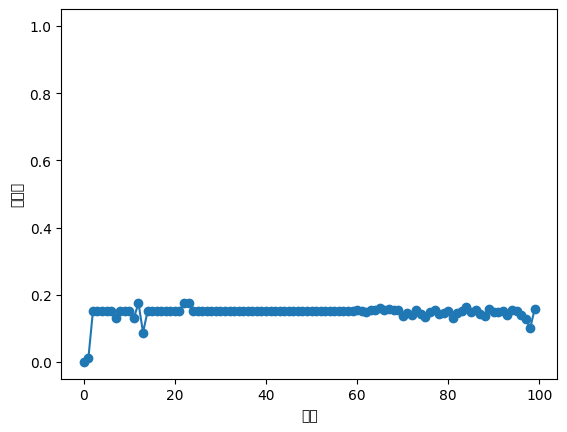

In [19]:
# coding: utf-8
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
from common import config
config.GPU = True

import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data_from_dataframe(word_df)
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 32
hidden_size = 256
batch_size = 128
max_epoch = 100
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params('/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/EssayWordAttention.pkl')

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()

## GPU 테스트

In [6]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding


In [7]:
!nvidia-smi

Tue Dec 12 08:07:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------